In [1]:
import os
import json
from matplotlib import pyplot as plt

In [9]:
# Search for the available json files in the results folder:
rootdir = "../results/datapoints"

plot_info_files = []
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if file.endswith(".json") and "detailed" in file:
            plot_info_files.append(os.path.join(subdir, file))
    break

# Reading the files and storing the info in dicts: 
plot_info_1e4 = {}
plot_info_1e8 = {}

for file in plot_info_files:
    file_name = file.split("/")[-1].removesuffix('.json')
    
    if (file_name.startswith("less_trivial_lp") and "1e-4" in file_name):
        with open(file) as json_content:
            plot_info_1e4[file_name] = json.load(json_content)
        # print("Read file:", file_name)

    if (file_name.startswith("less_trivial_lp") and "1e-8" in file_name):
        with open(file) as json_content:
            plot_info_1e8[file_name] = json.load(json_content)
        print("Read file:", file_name)

# print("Inner keys:")
# print(plot_info_1e4[file_name].keys())

Read file: less_trivial_lp_dwifob_alt_C_+primal_weight_restart=40_1e-8_m=0_detailed
Read file: less_trivial_lp_dwifob_alt_C_+primal_weight_restart=40_1e-8_m=1_detailed


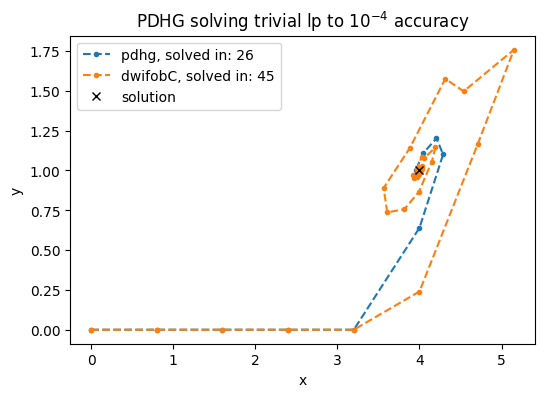

In [3]:
# Visualizing the trivial lp solved with PDHG:
pdgh_solve = plot_info_1e4["less_trivial_lp_dwifob_dwifob_1e-4_m=0_detailed"]
dwifob_solve = plot_info_1e4["less_trivial_lp_dwifob_dwifob_1e-4_m=1_detailed"]
dwifob_solveA = plot_info_1e4["less_trivial_lp_dwifob_altA_dwifob_1e-4_m=1_detailed"]
dwifob_solveB = plot_info_1e4["less_trivial_lp_dwifob_altB_dwifob_1e-4_m=1_detailed"]
dwifob_solveC = plot_info_1e4["less_trivial_lp_dwifob_altC_dwifob_1e-4_m=1_detailed"]

plt.figure(figsize=(6, 4))
iters=len(pdgh_solve["primal_iterates"])
plt.plot(pdgh_solve["primal_iterates"], pdgh_solve["dual_iterates"], ".--", label=f"pdhg, solved in: {iters}")
# iters=len(dwifob_solve["primal_iterates"])
# plt.plot(dwifob_solve["primal_iterates"], dwifob_solve["dual_iterates"], ".--", label=f"dwifob, solved in: {iters}")
# iters=len(dwifob_solveA["primal_iterates"])
# plt.plot(dwifob_solveA["primal_iterates"], dwifob_solveA["dual_iterates"], ".--", label=f"dwifobA, solved in: {iters}")
# iters=len(dwifob_solve["primal_iterates"])
# plt.plot(dwifob_solveB["primal_iterates"], dwifob_solveB["dual_iterates"], ".--", label=f"dwifobB, solved in: {iters}")
iters=len(dwifob_solveC["primal_iterates"])
plt.plot(dwifob_solveC["primal_iterates"], dwifob_solveC["dual_iterates"], ".--", label=f"dwifobC, solved in: {iters}")

plt.plot(4, 1, "xk", label="solution")
plt.xlabel("x") 
plt.ylabel("y")
plt.title("PDHG solving trivial lp to $10^{-4}$ accuracy")
plt.legend();

In [15]:
def plot_dwifob_iterates(dwifob_solve, window, end, title):
    primal_plot_dwifob = dwifob_solve["primal_iterates"][:end]
    dual_plot_dwifob = dwifob_solve["dual_iterates"][:end]
    plt.figure(figsize=(8, 6))
    plt.plot(primal_plot_dwifob, dual_plot_dwifob, "+--", label=f"iterates", markersize=5)

    start = max(0, end-window)
    primal_plot_dwifob = dwifob_solve["primal_iterates"][start:end]
    dual_plot_dwifob = dwifob_solve["dual_iterates"][start:end]
    primal_hat_dwifob = dwifob_solve["primal_hat_iterates"][start:end]
    dual_hat_dwifob = dwifob_solve["dual_hat_iterates"][start:end]
    primal_deviations = dwifob_solve["primal_deviations"][start:end]
    dual_deviations = dwifob_solve["dual_deviations"][start:end]

    plt.plot(primal_hat_dwifob, dual_hat_dwifob, "x--", label="hat iterates", markersize=10)

    for i in range(len(primal_plot_dwifob)):
        if not (primal_deviations[i][0] == 0 and dual_deviations[i][0] == 0):
            plt.arrow(primal_plot_dwifob[i][0], dual_plot_dwifob[i][0], primal_deviations[i][0], dual_deviations[i][0], 
                    color="r", lw=1, fill=False, head_length=.07, head_width=.07, length_includes_head=True, overhang=0.2)
            
    plt.plot(4, 1, "xk", label="solution")
    plt.xlabel("x") 
    plt.ylabel("y")
    plt.title(title)
    plt.legend();

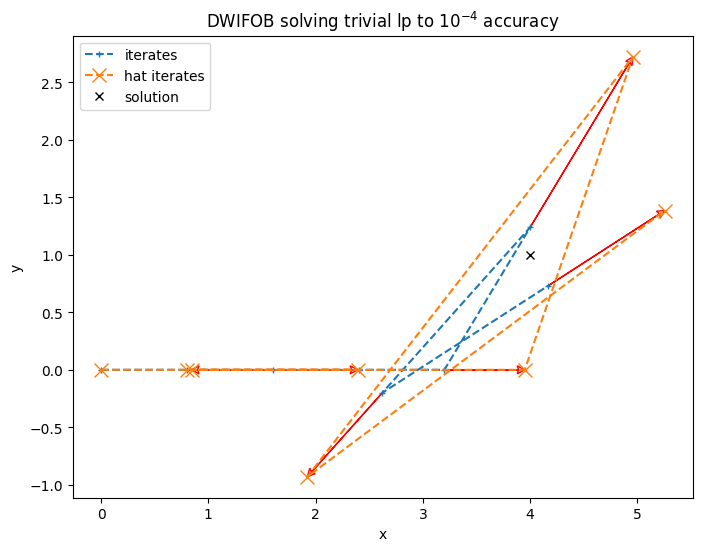

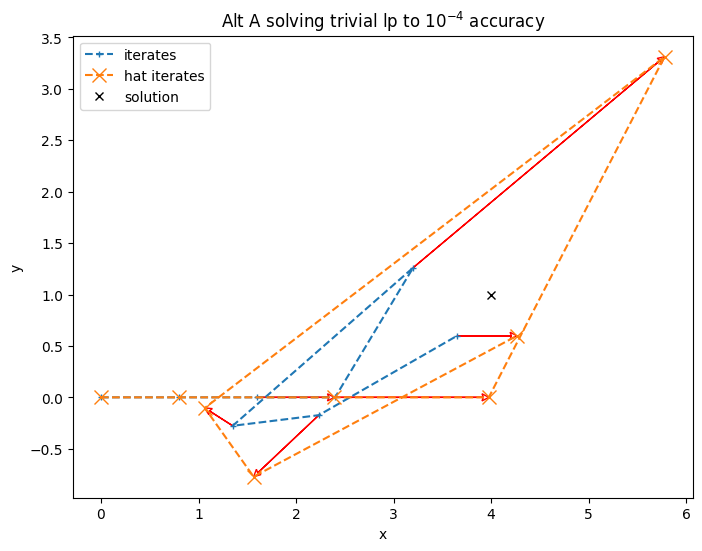

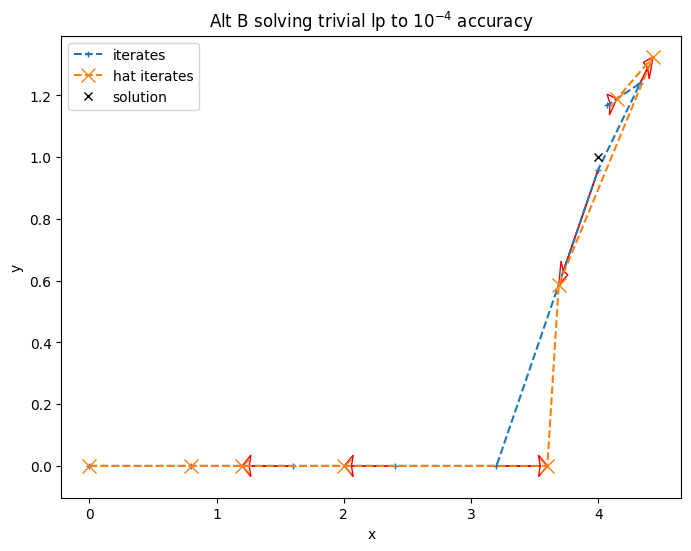

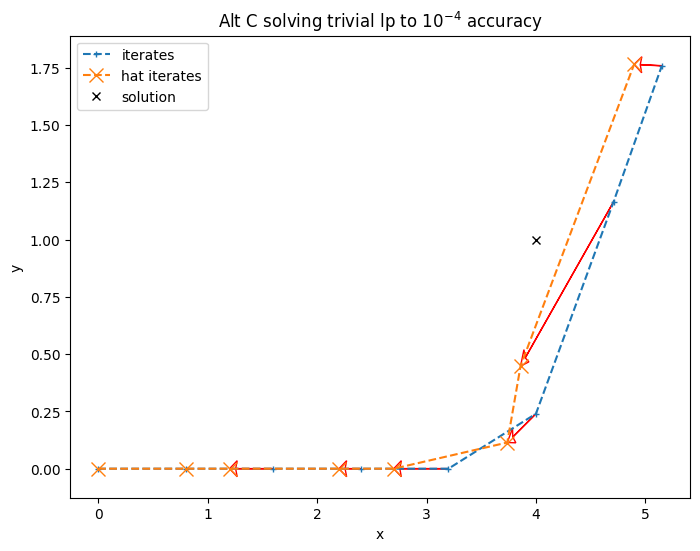

In [16]:
dwifob_solve = plot_info_1e4["less_trivial_lp_dwifob_dwifob_1e-4_m=1_detailed"]
dwifob_solve_altA = plot_info_1e4["less_trivial_lp_dwifob_altA_dwifob_1e-4_m=1_detailed"]
dwifob_solve_altB = plot_info_1e4["less_trivial_lp_dwifob_altB_dwifob_1e-4_m=1_detailed"]
dwifob_solve_altC = plot_info_1e4["less_trivial_lp_dwifob_altC_dwifob_1e-4_m=1_detailed"]

iters=len(dwifob_solve["primal_iterates"])
end = 8         # Up to which iterate we see.
window = 10      # How many iterates we see at the same time.
plot_dwifob_iterates(dwifob_solve, window, end, "DWIFOB solving trivial lp to $10^{-4}$ accuracy")
plot_dwifob_iterates(dwifob_solve_altA, window, end, "Alt A solving trivial lp to $10^{-4}$ accuracy")
plot_dwifob_iterates(dwifob_solve_altB, window, end, "Alt B solving trivial lp to $10^{-4}$ accuracy")
plot_dwifob_iterates(dwifob_solve_altC, window, end, "Alt C solving trivial lp to $10^{-4}$ accuracy")


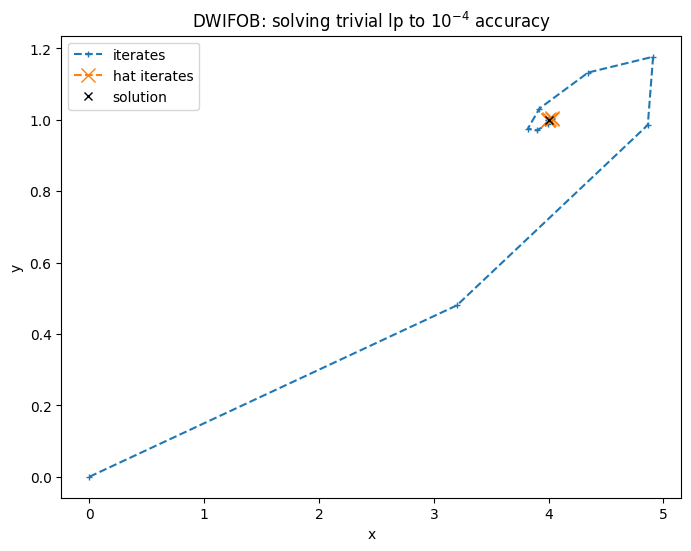

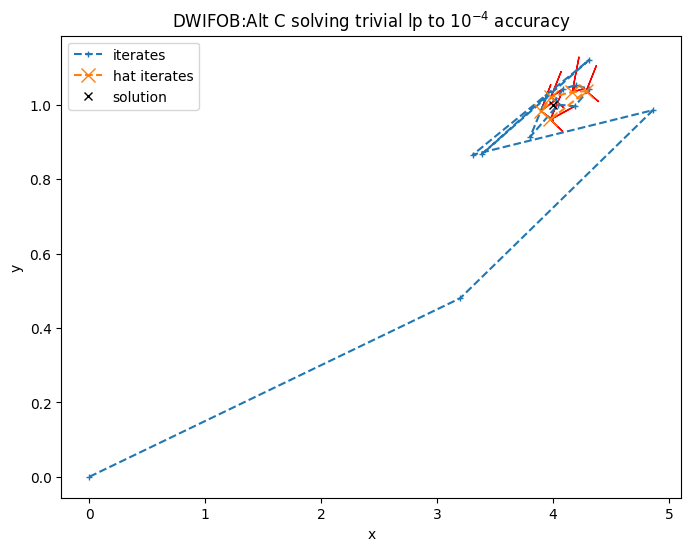

In [12]:
pdhg_solve = plot_info_1e8["less_trivial_lp_dwifob_alt_C_+primal_weight_restart=40_1e-8_m=0_detailed"]
dwifob_solve_altC = plot_info_1e8["less_trivial_lp_dwifob_alt_C_+primal_weight_restart=40_1e-8_m=1_detailed"]

iters=len(dwifob_solve["primal_iterates"])
end = 14         # Up to which iterate we see.
window = 5      # How many iterates we see at the same time.
plot_dwifob_iterates(pdhg_solve, window, end)
plot_dwifob_iterates(dwifob_solve_altC, window, end, "Alt C")
